In [1]:
import random
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np
import time
import pandas as pd

In [2]:
############## Begin Traveling Salesperson problem ##############
# SOURCE: https://mlrose.readthedocs.io/en/stable/source/tutorial2.html

In [3]:
## TSP with small n, n = 8

In [378]:
# Create list of city coordinates
coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

# Initialize fitness function object using coords_list
fitness_coords = mlrose.TravellingSales(coords = coords_list)

In [379]:
# Define optimization problem object
problem_fit = mlrose.TSPOpt(length = 8, fitness_fn = fitness_coords, maximize=False)

In [380]:
# GA
times = []
scores = []
iterations = []
population_size =[]
population = 100

for x in range(0,9):
    population = population + 100
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem_fit, mutation_prob = 0.3, pop_size=population, random_state = 2, curve=True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    population_size.append(population)

df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['pop size'] =population_size
print(df)
df.describe()

   wall clock time      score  iterations  pop size
0         0.951417  18.180340          15       200
1         3.345109  17.342618          34       300
2         1.532523  17.342618          12       400
3         1.752735  17.342618          11       500
4         2.112996  18.180340          11       600
5         2.815839  17.342618          12       700
6         4.353960  17.342618          17       800
7         4.491901  17.342618          14       900
8         5.518559  17.342618          17      1000


,wall clock time,score,iterations,pop size
count,9.000000,9.000000,9.000000,9.000000
mean,2.986116,17.528778,15.888889,600.000000
std,1.551049,0.369401,7.184087,273.861279
min,0.951417,17.342618,11.000000,200.000000
25%,1.752735,17.342618,12.000000,400.000000
50%,2.815839,17.342618,14.000000,600.000000
75%,4.353960,17.342618,17.000000,800.000000
max,5.518559,18.180340,34.000000,1000.000000


In [9]:
# RHC
times = []
scores = []
iterations = []
num_of_restarts =[]
restart = 1
for x in range(0,9):
    restart = restart + 2*x
    
    start = time.time()
    best_state, best_fitness, RHC_fitness_curve = mlrose.random_hill_climb(problem_fit, restarts = restart, curve = True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    num_of_restarts.append(restart)
    
    
df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['num of restarts'] =num_of_restarts
print(df)
df.describe()

   wall clock time      score  iterations  num of restarts
0         0.026448  17.342618          13                1
1         0.027731  17.342618          13                3
2         0.041140  19.549823          13                7
3         0.056175  17.342618          13               13
4         0.085633  17.342618          13               21
5         0.126632  17.342618          13               31
6         0.158816  17.342618          13               43
7         0.222309  17.342618          13               57
8         0.273185  17.342618          13               73


,wall clock time,score,iterations,num of restarts
count,9.000000,9.000000,9.0,9.000000
mean,0.113119,17.587863,13.0,27.666667
std,0.089300,0.735735,0.0,25.416530
min,0.026448,17.342618,13.0,1.000000
25%,0.041140,17.342618,13.0,7.000000
50%,0.085633,17.342618,13.0,21.000000
75%,0.158816,17.342618,13.0,43.000000
max,0.273185,19.549823,13.0,73.000000


In [10]:
# SA
times = []
scores = []
iterations = []
num_of_attempts =[]
max_attempt = 9

for x in range(0,9):
    max_attempt = max_attempt + 1
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem_fit, max_attempts = max_attempt, curve=True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    num_of_attempts.append(max_attempt)
    
df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['num of attempts'] =num_of_attempts
print(df)
df.describe()

   wall clock time      score  iterations  num of attempts
0         0.011010  22.032759          26               10
1         0.004950  20.748224          15               11
2         0.009733  22.535880          29               12
3         0.019823  17.342618          56               13
4         0.017438  17.342618          77               14
5         0.009916  18.180340          55               15
6         0.014817  18.180340          81               16
7         0.007611  17.342618          40               17
8         0.017404  20.465723          97               18


,wall clock time,score,iterations,num of attempts
count,9.000000,9.000000,9.000000,9.000000
mean,0.012523,19.352347,52.888889,14.000000
std,0.005061,2.102731,27.899124,2.738613
min,0.004950,17.342618,15.000000,10.000000
25%,0.009733,17.342618,29.000000,12.000000
50%,0.011010,18.180340,55.000000,14.000000
75%,0.017404,20.748224,77.000000,16.000000
max,0.019823,22.535880,97.000000,18.000000


In [11]:
# MIMIC
times = []
scores = []
iterations = []
population_size =[]
population = 100

for x in range(0,9):
    population = population + 100
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.mimic(problem_fit, pop_size=population, random_state = 2, curve=True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    population_size.append(population)

df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['pop size'] =population_size
print(df)
df.describe()

   wall clock time      score  iterations  pop size
0         2.430541  17.342618          12       200
1         3.871137  17.342618          14       300
2         4.295886  17.342618          12       400
3         5.260420  17.342618          12       500
4         5.743879  17.342618          11       600
5         6.633684  17.342618          11       700
6         8.272626  17.342618          12       800
7         9.244153  17.342618          12       900
8        10.179909  17.342618          12      1000


,wall clock time,score,iterations,pop size
count,9.000000,9.000000e+00,9.000000,9.000000
mean,6.214693,1.734262e+01,12.000000,600.000000
std,2.596570,3.552714e-15,0.866025,273.861279
min,2.430541,1.734262e+01,11.000000,200.000000
25%,4.295886,1.734262e+01,12.000000,400.000000
50%,5.743879,1.734262e+01,12.000000,600.000000
75%,8.272626,1.734262e+01,12.000000,800.000000
max,10.179909,1.734262e+01,14.000000,1000.000000


In [12]:
## TSP with bigger n, n = 60

#build list of 60 cities that are unique
coords_list =[]
for x in range(0,60):
    coord = tuple((random.randint(1,21), random.randint(1,21)))
    while coord in coords_list:
        coord = tuple((random.randint(1,21), random.randint(1,21)))
    coords_list.append(coord)
print(coords_list)

[(21, 10), (2, 16), (6, 15), (5, 6), (9, 20), (20, 8), (1, 9), (11, 11), (4, 20), (16, 21), (15, 21), (8, 13), (12, 8), (19, 15), (13, 8), (7, 7), (7, 19), (14, 9), (1, 15), (4, 15), (4, 19), (16, 19), (16, 9), (13, 5), (9, 14), (7, 9), (3, 4), (14, 1), (5, 18), (19, 10), (18, 6), (8, 1), (12, 11), (16, 12), (20, 20), (13, 14), (8, 21), (13, 1), (17, 9), (8, 18), (18, 18), (12, 9), (15, 6), (9, 2), (9, 1), (21, 18), (11, 18), (15, 13), (9, 10), (2, 21), (2, 5), (8, 17), (12, 12), (11, 8), (1, 5), (18, 7), (8, 11), (18, 11), (19, 16), (1, 18)]


In [383]:
# Initialize fitness function object using coords_list
fitness_coords = mlrose.TravellingSales(coords = coords_list)

# Define optimization problem object
problem_fit = mlrose.TSPOpt(length = 60, fitness_fn = fitness_coords, maximize=False)

   wall clock time       score  iterations  pop size
0         7.012750  502.705872          14       350
1         7.423166  500.122312          12       400
2        10.468870  503.886786          16       450
3         8.594728  533.192446          12       500
4        13.209759  507.217322          17       550
5        10.320035  513.754728          12       600
6        21.031990  516.060964          23       650
7        23.603174  515.426837          24       700
8        21.673936  513.768235          20       750


,wall clock time,score,iterations,pop size
count,9.000000,9.000000,9.000000,9.000000
mean,13.704267,511.792834,16.666667,550.000000
std,6.592618,9.995827,4.716991,136.930639
min,7.012750,500.122312,12.000000,350.000000
25%,8.594728,503.886786,12.000000,450.000000
50%,10.468870,513.754728,16.000000,550.000000
75%,21.031990,515.426837,20.000000,650.000000
max,23.603174,533.192446,24.000000,750.000000


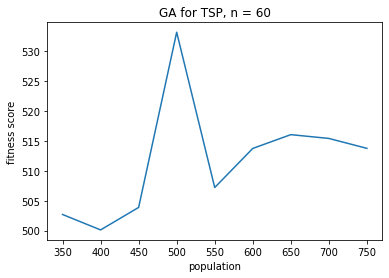

In [384]:
# GA
import matplotlib.pyplot as plt

times = []
scores = []
iterations = []
population_size =[]
population = 300

for x in range(0,9):
    population = population + 50
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem_fit, mutation_prob = 0.3, pop_size=population, random_state = 2, curve=True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    population_size.append(population)
    
df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['pop size'] =population_size
print(df)

x=population_size
y=scores
plt.plot(x,y)
plt.title("GA for TSP, n = 60")
plt.xlabel("population")
plt.ylabel("fitness score")

df.describe()

Text(0.5, 1.0, 'Fitness Convergence for TSP using GA, n = 60')

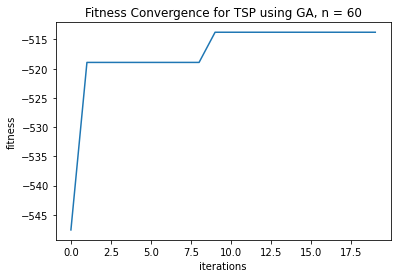

In [385]:
plt.plot(fitness_curve)
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.title('Fitness Convergence for TSP using GA, n = 60')

   wall clock time       score  iterations  num of restarts
0         0.303687  417.894620         263                2
1         0.262851  465.097182         267                3
2         0.399035  470.603092         394                4
3         0.854333  417.627714         724                5
4         0.564190  428.528558         449                6
5         0.656743  422.870327         574                7
6         0.863001  414.777714         761                8
7         0.862721  418.843364         832                9
8         0.761492  451.454371         713               10


,wall clock time,score,iterations,num of restarts
count,9.000000,9.000000,9.000000,9.000000
mean,0.614228,434.188549,553.000000,6.000000
std,0.243284,22.055661,217.479884,2.738613
min,0.262851,414.777714,263.000000,2.000000
25%,0.399035,417.894620,394.000000,4.000000
50%,0.656743,422.870327,574.000000,6.000000
75%,0.854333,451.454371,724.000000,8.000000
max,0.863001,470.603092,832.000000,10.000000


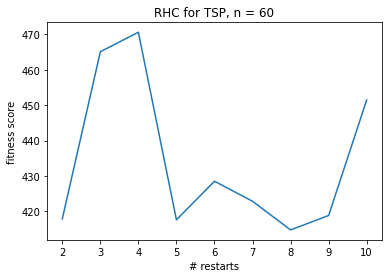

In [386]:
# RHC
times = []
scores = []
iterations = []
num_of_restarts =[]
restart = 1
for x in range(0,9):
    restart = restart + 1
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem_fit, restarts = restart, curve = True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    num_of_restarts.append(restart)
    
    
df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['num of restarts'] =num_of_restarts
print(df)

x=num_of_restarts
y=scores
plt.plot(x,y)
plt.title("RHC for TSP, n = 60")
plt.xlabel("# restarts")
plt.ylabel("fitness score")

df.describe()

Text(0.5, 1.0, 'Fitness Convergence for TSP using RHC, n = 60')

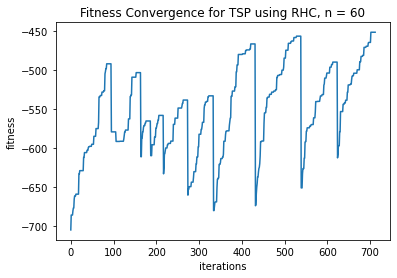

In [387]:
plt.plot(fitness_curve)
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.title('Fitness Convergence for TSP using RHC, n = 60')

   wall clock time       score  iterations  num of attempts
0         0.027023  555.423431          15                3
1         0.005838  605.898822           5                4
2         0.056924  543.209548          46                5
3         0.042422  520.184282          32                6
4         0.015015  597.122458          13                7
5         0.048444  540.514392          44                8
6         0.086653  486.661049          82                9
7         0.101720  457.819277          92               10
8         0.168416  456.903693         160               11


,wall clock time,score,iterations,num of attempts
count,9.000000,9.000000,9.000000,9.000000
mean,0.061384,529.304106,54.333333,7.000000
std,0.050848,54.452769,49.641213,2.738613
min,0.005838,456.903693,5.000000,3.000000
25%,0.027023,486.661049,15.000000,5.000000
50%,0.048444,540.514392,44.000000,7.000000
75%,0.086653,555.423431,82.000000,9.000000
max,0.168416,605.898822,160.000000,11.000000


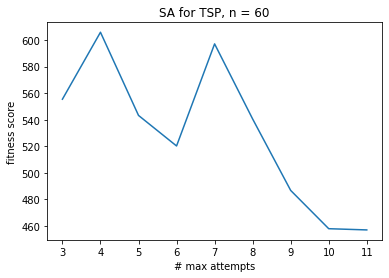

In [388]:
# SA
times = []
scores = []
iterations = []
num_of_attempts =[]
max_attempt = 2

for x in range(0,9):
    max_attempt = max_attempt + 1
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem_fit, max_attempts = max_attempt, curve=True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    num_of_attempts.append(max_attempt)
    
df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['num of attempts'] =num_of_attempts
print(df)

x=num_of_attempts
y=scores
plt.plot(x,y)
plt.title("SA for TSP, n = 60")
plt.xlabel("# max attempts")
plt.ylabel("fitness score")

df.describe()

Text(0.5, 1.0, 'Fitness Convergence for TSP using SA, n = 60')

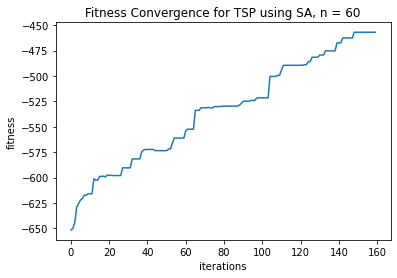

In [389]:
plt.plot(fitness_curve)
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.title('Fitness Convergence for TSP using SA, n = 60')

   wall clock time       score  iterations  pop size
0        20.274462  575.443953          11        25
1        21.992609  559.897105          11        50
2        23.938239  559.897105          11        75
3        26.183962  559.897105          11       100
4        28.930777  559.897105          11       125
5        32.579185  558.888310          11       150
6        51.145803  500.478201          17       175
7        34.606491  565.524899          11       200
8        36.776321  549.629856          11       225


,wall clock time,score,iterations,pop size
count,9.000000,9.000000,9.000000,9.00000
mean,30.714206,554.394849,11.666667,125.00000
std,9.536112,21.324702,2.000000,68.46532
min,20.274462,500.478201,11.000000,25.00000
25%,23.938239,558.888310,11.000000,75.00000
50%,28.930777,559.897105,11.000000,125.00000
75%,34.606491,559.897105,11.000000,175.00000
max,51.145803,575.443953,17.000000,225.00000


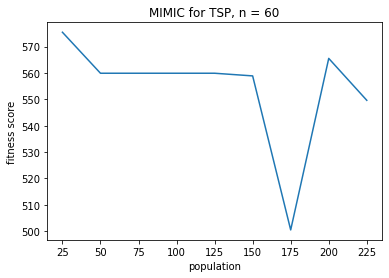

In [390]:
# MIMIC
times = []
scores = []
iterations = []
population_size =[]
population = 0

for x in range(0,9):
    population = population + 25
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.mimic(problem_fit, pop_size=population, random_state = 2, curve=True, max_iters=50, max_attempts=10)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    population_size.append(population)

df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['pop size'] =population_size
print(df)

x=population_size
y=scores
plt.plot(x,y)
plt.title("MIMIC for TSP, n = 60")
plt.xlabel("population")
plt.ylabel("fitness score")

df.describe()

Text(0.5, 1.0, 'Fitness Convergence for TSP using MIMIC, n = 60')

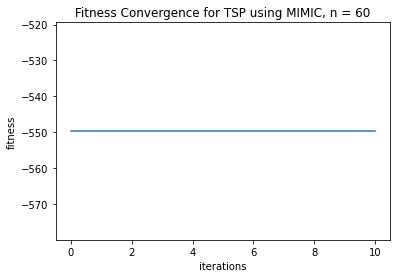

In [391]:
plt.plot(fitness_curve)
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.title('Fitness Convergence for TSP using MIMIC, n = 60')

In [30]:
############## End Traveling Salesperson problem ##############

In [31]:
############## Begin Knapsack problem ##############

In [32]:
## Knapsack n =5
weights = [10, 5, 2, 8, 15]
values = [1, 2, 3, 4, 5]

max_weight_pct = 0.6
fitness = mlrose.Knapsack(weights, values, max_weight_pct)
print(values)
print(weights)

[1, 2, 3, 4, 5]
[10, 5, 2, 8, 15]


In [33]:
# Define optimization problem object
problem = mlrose.DiscreteOpt(length=len(values), fitness_fn=fitness, maximize=True, max_val=2)

In [34]:
# GA
times = []
scores = []
iterations = []
population_size =[]
population = 5

for x in range(0,9):
    population = population + 1
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=population, random_state = 2, curve=True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    population_size.append(population)

df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['pop size'] =population_size
print(df)
df.describe()

   wall clock time  score  iterations  pop size
0         0.022650    9.0          12         6
1         0.030208   10.0          16         7
2         0.023056    9.0          13         8
3         0.016784   10.0          13         9
4         0.029462   10.0          21        10
5         0.018182    9.0          12        11
6         0.024538   10.0          15        12
7         0.023054   10.0          13        13
8         0.020974    9.0          11        14


,wall clock time,score,iterations,pop size
count,9.000000,9.000000,9.000000,9.000000
mean,0.023212,9.555556,14.000000,10.000000
std,0.004497,0.527046,3.041381,2.738613
min,0.016784,9.000000,11.000000,6.000000
25%,0.020974,9.000000,12.000000,8.000000
50%,0.023054,10.000000,13.000000,10.000000
75%,0.024538,10.000000,15.000000,12.000000
max,0.030208,10.000000,21.000000,14.000000


In [35]:
# RHC
times = []
scores = []
iterations = []
num_of_restarts =[]
restart = 1
for x in range(0,9):
    restart = restart + 1
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, restarts = restart, curve = True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    num_of_restarts.append(restart)
    
    
df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['num of restarts'] =num_of_restarts
print(df)
df.describe()

   wall clock time  score  iterations  num of restarts
0         0.002498    8.0          33                2
1         0.003900   10.0          54                3
2         0.004390    9.0          63                4
3         0.006529   10.0          92                5
4         0.005453    9.0          84                6
5         0.006899    9.0          98                7
6         0.008510   10.0         126                8
7         0.009766   10.0         118                9
8         0.009646   10.0         139               10


,wall clock time,score,iterations,num of restarts
count,9.000000,9.000000,9.000000,9.000000
mean,0.006399,9.444444,89.666667,6.000000
std,0.002574,0.726483,35.103419,2.738613
min,0.002498,8.000000,33.000000,2.000000
25%,0.004390,9.000000,63.000000,4.000000
50%,0.006529,10.000000,92.000000,6.000000
75%,0.008510,10.000000,118.000000,8.000000
max,0.009766,10.000000,139.000000,10.000000


In [36]:
# SA
times = []
scores = []
iterations = []
num_of_attempts =[]
max_attempt = 9

for x in range(0,9):
    max_attempt = max_attempt + x
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, max_attempts = max_attempt, curve=True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    num_of_attempts.append(max_attempt)
    
df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['num of attempts'] =num_of_attempts
print(df)
df.describe()

   wall clock time  score  iterations  num of attempts
0         0.001794    9.0          18                9
1         0.001429    9.0          18               10
2         0.001683    9.0          21               12
3         0.001124    8.0          15               15
4         0.002323    9.0          32               19
5         0.004368    7.0          59               24
6         0.002238    9.0          30               30
7         0.003097    9.0          39               37
8         0.003999   10.0          54               45


,wall clock time,score,iterations,num of attempts
count,9.000000,9.000000,9.000000,9.000000
mean,0.002450,8.777778,31.777778,22.333333
std,0.001139,0.833333,16.076207,12.708265
min,0.001124,7.000000,15.000000,9.000000
25%,0.001683,9.000000,18.000000,12.000000
50%,0.002238,9.000000,30.000000,19.000000
75%,0.003097,9.000000,39.000000,30.000000
max,0.004368,10.000000,59.000000,45.000000


In [37]:
# MIMIC
times = []
scores = []
iterations = []
population_size =[]
population = 0

for x in range(0,9):
    population = population + 5
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=population, random_state = 2, curve=True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    population_size.append(population)

df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['pop size'] =population_size
print(df)
df.describe()

   wall clock time  score  iterations  pop size
0         0.158237    9.0          11         5
1         0.142487    9.0          11        10
2         0.137737    9.0          11        15
3         0.152336   10.0          12        20
4         0.150112   10.0          11        25
5         0.143996   10.0          11        30
6         0.160782   10.0          12        35
7         0.170143   10.0          12        40
8         0.155773   10.0          11        45


,wall clock time,score,iterations,pop size
count,9.000000,9.000000,9.000000,9.000000
mean,0.152400,9.666667,11.333333,25.000000
std,0.010122,0.500000,0.500000,13.693064
min,0.137737,9.000000,11.000000,5.000000
25%,0.143996,9.000000,11.000000,15.000000
50%,0.152336,10.000000,11.000000,25.000000
75%,0.158237,10.000000,12.000000,35.000000
max,0.170143,10.000000,12.000000,45.000000


In [38]:
## Knapsack n = 60
weights = []
values = []
for i in range(0,60):
    weights.append(random.randint(1,20))
    values.append(random.randint(1,10))

max_weight_pct = 0.6
fitness = mlrose.Knapsack(weights, values, max_weight_pct)
print(values)
print(weights)

[10, 3, 7, 8, 10, 3, 3, 2, 9, 7, 1, 9, 7, 4, 4, 4, 8, 6, 10, 1, 3, 6, 7, 1, 5, 6, 2, 10, 5, 1, 2, 5, 4, 4, 4, 8, 8, 8, 6, 9, 8, 2, 9, 10, 5, 6, 8, 6, 8, 10, 7, 5, 2, 10, 4, 3, 6, 4, 10, 10]
[4, 10, 9, 3, 7, 3, 8, 13, 11, 14, 19, 5, 7, 19, 4, 13, 1, 16, 14, 8, 17, 19, 8, 15, 12, 9, 8, 12, 8, 4, 17, 15, 15, 13, 15, 18, 14, 6, 11, 6, 17, 8, 4, 6, 9, 15, 8, 1, 14, 18, 17, 11, 9, 10, 8, 16, 17, 13, 12, 8]


In [393]:
# Define optimization problem object
problem = mlrose.DiscreteOpt(length=len(values), fitness_fn=fitness, maximize=True, max_val=2)

   wall clock time  score  iterations  pop size
0         0.071631  240.0          18        21
1         0.061913  237.0          16        22
2         0.058578  224.0          14        23
3         0.042493  236.0          11        24
4         0.048111  232.0          12        25
5         0.095366  244.0          21        26
6         0.068155  241.0          16        27
7         0.066514  233.0          15        28
8         0.159517  244.0          34        29


,wall clock time,score,iterations,pop size
count,9.000000,9.000000,9.000000,9.000000
mean,0.074698,236.777778,17.444444,25.000000
std,0.035192,6.457124,6.894039,2.738613
min,0.042493,224.000000,11.000000,21.000000
25%,0.058578,233.000000,14.000000,23.000000
50%,0.066514,237.000000,16.000000,25.000000
75%,0.071631,241.000000,18.000000,27.000000
max,0.159517,244.000000,34.000000,29.000000


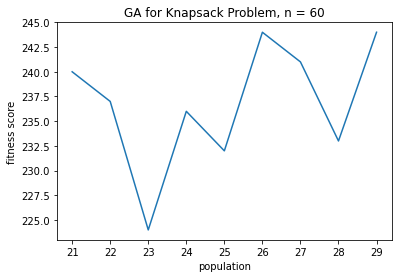

In [394]:
# GA
times = []
scores = []
iterations = []
population_size =[]
population = 20

for x in range(0,9):
    population = population + 1
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem, pop_size=population, random_state = 2, curve=True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    population_size.append(population)

df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['pop size'] =population_size
print(df)

x=population_size
y=scores
plt.plot(x,y)
plt.title("GA for Knapsack Problem, n = 60")
plt.xlabel("population")
plt.ylabel("fitness score")

df.describe()

Text(0.5, 1.0, 'Fitness Convergence for Knapsack using GA, n = 60')

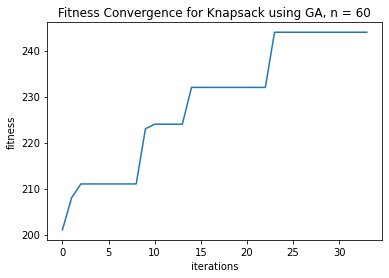

In [395]:
plt.plot(fitness_curve)
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.title('Fitness Convergence for Knapsack using GA, n = 60')

   wall clock time  score  iterations  num of restarts
0         0.023020  243.0         269               10
1         0.058746  248.0         503               20
2         0.067350  239.0         720               30
3         0.080740  243.0        1009               40
4         0.093331  239.0        1175               50
5         0.129940  246.0        1614               60
6         0.146358  247.0        1826               70
7         0.155042  251.0        1939               80
8         0.180281  252.0        2137               90


,wall clock time,score,iterations,num of restarts
count,9.000000,9.000000,9.000000,9.000000
mean,0.103867,245.333333,1243.555556,50.000000
std,0.051835,4.716991,669.922031,27.386128
min,0.023020,239.000000,269.000000,10.000000
25%,0.067350,243.000000,720.000000,30.000000
50%,0.093331,246.000000,1175.000000,50.000000
75%,0.146358,248.000000,1826.000000,70.000000
max,0.180281,252.000000,2137.000000,90.000000


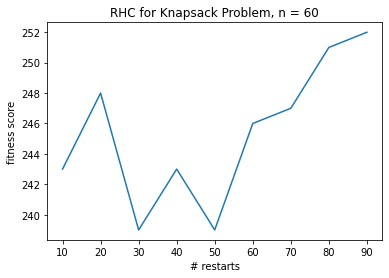

In [396]:
# RHC
times = []
scores = []
iterations = []
num_of_restarts =[]
restart = 0
for x in range(0,9):
    restart = restart + 10
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem, restarts = restart, curve = True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    num_of_restarts.append(restart)
    
    
df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['num of restarts'] =num_of_restarts
print(df)

x=num_of_restarts
y=scores
plt.plot(x,y)
plt.title("RHC for Knapsack Problem, n = 60")
plt.xlabel("# restarts")
plt.ylabel("fitness score")

df.describe()

Text(0.5, 1.0, 'Fitness Convergence for Knapsack using RHC, n = 60')

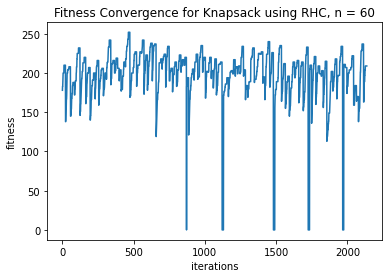

In [397]:
plt.plot(fitness_curve)
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.title('Fitness Convergence for Knapsack using RHC, n = 60')

   wall clock time  score  iterations  num of attempts
0         0.007047  202.0          40                9
1         0.004541  209.0          27               10
2         0.006579  194.0          40               12
3         0.006319  206.0          44               15
4         0.005588  208.0          38               19
5         0.010580  233.0          67               24
6         0.013120  230.0          86               30
7         0.006775  248.0          76               37
8         0.005818  211.0          72               45


,wall clock time,score,iterations,num of attempts
count,9.000000,9.000000,9.000000,9.000000
mean,0.007374,215.666667,54.444444,22.333333
std,0.002719,17.414075,20.845330,12.708265
min,0.004541,194.000000,27.000000,9.000000
25%,0.005818,206.000000,40.000000,12.000000
50%,0.006579,209.000000,44.000000,19.000000
75%,0.007047,230.000000,72.000000,30.000000
max,0.013120,248.000000,86.000000,45.000000


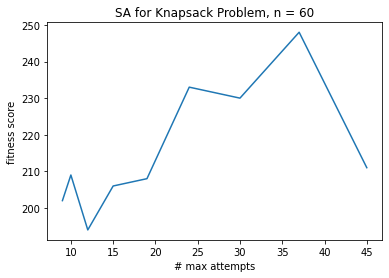

In [398]:
# SA
times = []
scores = []
iterations = []
num_of_attempts =[]
max_attempt = 9

for x in range(0,9):
    max_attempt = max_attempt + x
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem, max_attempts = max_attempt, curve=True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    num_of_attempts.append(max_attempt)
    
df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['num of attempts'] =num_of_attempts
print(df)

x=num_of_attempts
y=scores
plt.plot(x,y)
plt.title("SA for Knapsack Problem, n = 60")
plt.xlabel("# max attempts")
plt.ylabel("fitness score")

df.describe()

Text(0.5, 1.0, 'Fitness Convergence for Knapsack using SA, n = 60')

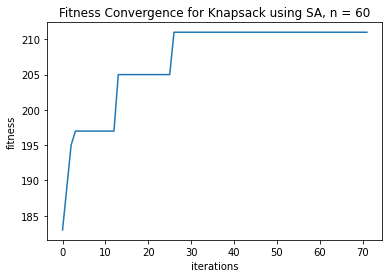

In [399]:
plt.plot(fitness_curve)
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.title('Fitness Convergence for Knapsack using SA, n = 60')

   wall clock time  score  iterations  pop size
0        44.163928  281.0          24        45
1        37.444219  267.0          20        50
2        34.180496  279.0          19        55
3        27.527965  256.0          15        60
4        50.314929  286.0          27        65
5        35.871571  287.0          19        70
6        41.910347  284.0          22        75
7        41.491978  288.0          22        80
8        35.672909  280.0          19        85


,wall clock time,score,iterations,pop size
count,9.000000,9.000000,9.000000,9.000000
mean,38.730927,278.666667,20.777778,65.000000
std,6.584399,10.583005,3.456074,13.693064
min,27.527965,256.000000,15.000000,45.000000
25%,35.672909,279.000000,19.000000,55.000000
50%,37.444219,281.000000,20.000000,65.000000
75%,41.910347,286.000000,22.000000,75.000000
max,50.314929,288.000000,27.000000,85.000000


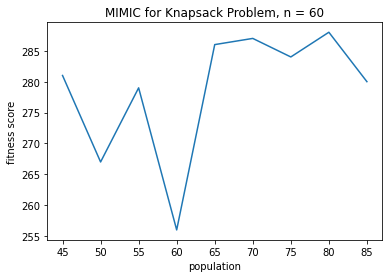

In [400]:
# MIMIC
times = []
scores = []
iterations = []
population_size =[]
population = 40

for x in range(0,9):
    population = population + 5
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.mimic(problem, pop_size=population, random_state = 2, curve=True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    population_size.append(population)

df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['pop size'] =population_size
print(df)

x=population_size
y=scores
plt.plot(x,y)
plt.title("MIMIC for Knapsack Problem, n = 60")
plt.xlabel("population")
plt.ylabel("fitness score")

df.describe()

Text(0.5, 1.0, 'Fitness Convergence for Knapsack using MIMIC, n = 60')

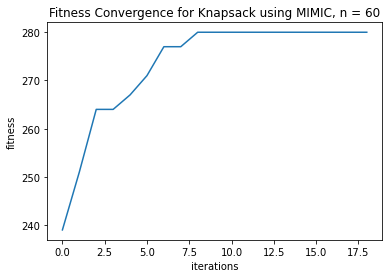

In [401]:
plt.plot(fitness_curve)
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.title('Fitness Convergence for Knapsack using MIMIC, n = 60')

In [44]:
############## End Knapsack problem ##############

In [45]:
############## Begin Continuous Peaks problem ##############

In [46]:
#small CPP problem
fitness = mlrose.ContinuousPeaks(t_pct=0.15)

In [47]:
# Define optimization problem object
CPPproblem = mlrose.DiscreteOpt(length=5, fitness_fn=fitness, maximize=True, max_val=2)

In [53]:
# GA
times = []
scores = []
iterations = []
population_size =[]
population = 0

for x in range(0,9):
    population = population + 1
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(CPPproblem, pop_size=population, random_state = 2, curve=True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    population_size.append(population)

df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['pop size'] =population_size
print(df)
df.describe()

   wall clock time  score  iterations  pop size
0         0.005857    7.0          10         1
1         0.004052    7.0          10         2
2         0.005999    8.0          11         3
3         0.007009    8.0          13         4
4         0.006971    8.0          11         5
5         0.009331    8.0          11         6
6         0.009590    8.0          11         7
7         0.012157    8.0          11         8
8         0.013261    8.0          11         9


,wall clock time,score,iterations,pop size
count,9.000000,9.000000,9.000000,9.000000
mean,0.008247,7.777778,11.000000,5.000000
std,0.003060,0.440959,0.866025,2.738613
min,0.004052,7.000000,10.000000,1.000000
25%,0.005999,8.000000,11.000000,3.000000
50%,0.007009,8.000000,11.000000,5.000000
75%,0.009590,8.000000,11.000000,7.000000
max,0.013261,8.000000,13.000000,9.000000


In [49]:
# RHC
times = []
scores = []
iterations = []
num_of_restarts =[]
restart = 0
for x in range(0,9):
    restart = restart + 1
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(CPPproblem, restarts = restart, curve = True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    num_of_restarts.append(restart)
    
    
df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['num of restarts'] =num_of_restarts
print(df)
df.describe()

   wall clock time  score  iterations  num of restarts
0         0.001211    7.0          24                1
1         0.001831    8.0          37                2
2         0.003957    8.0          51                3
3         0.005156    8.0          62                4
4         0.005780    8.0          86                5
5         0.006549    8.0          94                6
6         0.007506    8.0         107                7
7         0.007648    8.0         113                8
8         0.008779    8.0         130                9


,wall clock time,score,iterations,num of restarts
count,9.000000,9.000000,9.000000,9.000000
mean,0.005380,7.888889,78.222222,5.000000
std,0.002617,0.333333,36.523204,2.738613
min,0.001211,7.000000,24.000000,1.000000
25%,0.003957,8.000000,51.000000,3.000000
50%,0.005780,8.000000,86.000000,5.000000
75%,0.007506,8.000000,107.000000,7.000000
max,0.008779,8.000000,130.000000,9.000000


In [50]:
# SA
times = []
scores = []
iterations = []
num_of_attempts =[]
max_attempt = 5

for x in range(0,9):
    max_attempt = max_attempt + 5
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(CPPproblem, max_attempts = max_attempt, curve=True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    num_of_attempts.append(max_attempt)
    
df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['num of attempts'] =num_of_attempts
print(df)
df.describe()

   wall clock time  score  iterations  num of attempts
0         0.001754    7.0          17               10
1         0.015825    8.0         175               15
2         0.014576    8.0         172               20
3         0.087755    8.0        1498               25
4         0.390655    8.0        8061               30
5         0.384564    8.0        8093               35
6         1.388491    8.0       27995               40
7         5.361969    8.0      128941               45
8        11.661178    8.0      269297               50


,wall clock time,score,iterations,num of attempts
count,9.000000,9.000000,9.000000,9.000000
mean,2.145196,7.888889,49361.000000,30.000000
std,3.961590,0.333333,92286.633443,13.693064
min,0.001754,7.000000,17.000000,10.000000
25%,0.015825,8.000000,175.000000,20.000000
50%,0.384564,8.000000,8061.000000,30.000000
75%,1.388491,8.000000,27995.000000,40.000000
max,11.661178,8.000000,269297.000000,50.000000


In [51]:
# MIMIC
times = []
scores = []
iterations = []
population_size =[]
population = 0


for x in range(0,9):
    population = population + 1
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.mimic(CPPproblem, pop_size=population, random_state = 2, curve=True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    population_size.append(population)

df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['pop size'] =population_size
print(df)
df.describe()

   wall clock time  score  iterations  pop size
0         0.133463    7.0          10         1
1         0.118602    7.0          10         2
2         0.131471    8.0          11         3
3         0.133225    8.0          11         4
4         0.145201    8.0          11         5
5         0.139621    8.0          11         6
6         0.136547    8.0          11         7
7         0.157028    8.0          11         8
8         0.147898    8.0          11         9


,wall clock time,score,iterations,pop size
count,9.000000,9.000000,9.000000,9.000000
mean,0.138118,7.777778,10.777778,5.000000
std,0.011061,0.440959,0.440959,2.738613
min,0.118602,7.000000,10.000000,1.000000
25%,0.133225,8.000000,11.000000,3.000000
50%,0.136547,8.000000,11.000000,5.000000
75%,0.145201,8.000000,11.000000,7.000000
max,0.157028,8.000000,11.000000,9.000000


In [54]:
#larger CPP problem

In [402]:
fitness = mlrose.ContinuousPeaks(t_pct=0.15)
# Define optimization problem object
CPPproblem = mlrose.DiscreteOpt(length=60, fitness_fn=fitness, maximize=True, max_val=2)

   wall clock time  score  iterations  pop size
0         0.104751   14.0          23        15
1         0.068832   71.0          16        20
2         0.057615   16.0          16        25
3         0.064543   71.0          15        30
4         0.055221   12.0          11        35
5         0.090901   75.0          16        40
6         0.089046   76.0          13        45
7         0.104239   16.0          13        50
8         0.156773   17.0          19        55


,wall clock time,score,iterations,pop size
count,9.000000,9.000000,9.000000,9.000000
mean,0.087991,40.888889,15.777778,35.000000
std,0.032013,30.775170,3.562926,13.693064
min,0.055221,12.000000,11.000000,15.000000
25%,0.064543,16.000000,13.000000,25.000000
50%,0.089046,17.000000,16.000000,35.000000
75%,0.104239,71.000000,16.000000,45.000000
max,0.156773,76.000000,23.000000,55.000000


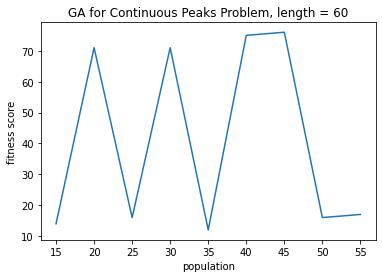

In [403]:
# GA
times = []
scores = []
iterations = []
population_size =[]
population = 10

for x in range(0,9):
    population = population + 5
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.genetic_alg(CPPproblem, pop_size=population, random_state = 2, curve=True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    population_size.append(population)

df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['pop size'] =population_size
print(df)

x=population_size
y=scores
plt.plot(x,y)
plt.title("GA for Continuous Peaks Problem, length = 60")
plt.xlabel("population")
plt.ylabel("fitness score")

df.describe()

Text(0.5, 1.0, 'Fitness Convergence for CPP using GA, length = 60')

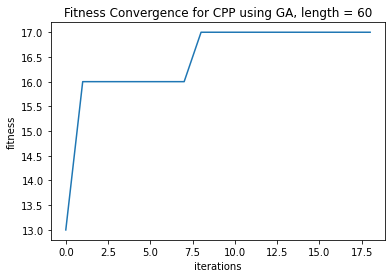

In [404]:
plt.plot(fitness_curve)
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.title('Fitness Convergence for CPP using GA, length = 60')

   wall clock time  score  iterations  num of restarts
0         0.026333   14.0         441               30
1         0.030026   12.0         489               31
2         0.025521   11.0         428               33
3         0.035334   16.0         471               36
4         0.034899   72.0         604               40
5         0.036938   14.0         612               45
6         0.039154   17.0         676               51
7         0.046833   19.0         837               58
8         0.055338   13.0         987               66


,wall clock time,score,iterations,num of restarts
count,9.000000,9.000000,9.000000,9.000000
mean,0.036709,20.888889,616.111111,43.333333
std,0.009606,19.329023,191.495721,12.708265
min,0.025521,11.000000,428.000000,30.000000
25%,0.030026,13.000000,471.000000,33.000000
50%,0.035334,14.000000,604.000000,40.000000
75%,0.039154,17.000000,676.000000,51.000000
max,0.055338,72.000000,987.000000,66.000000


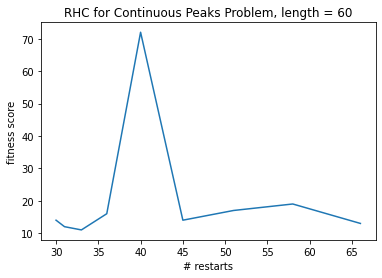

In [405]:
# RHC
times = []
scores = []
iterations = []
num_of_restarts =[]
restart = 30
for x in range(0,9):
    restart = restart + x
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(CPPproblem, restarts = restart, curve = True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    num_of_restarts.append(restart)
    
    
df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['num of restarts'] =num_of_restarts
print(df)

x=num_of_restarts
y=scores
plt.plot(x,y)
plt.title("RHC for Continuous Peaks Problem, length = 60")
plt.xlabel("# restarts")
plt.ylabel("fitness score")

df.describe()

Text(0.5, 1.0, 'Fitness Convergence for CPP using RHC, length = 60')

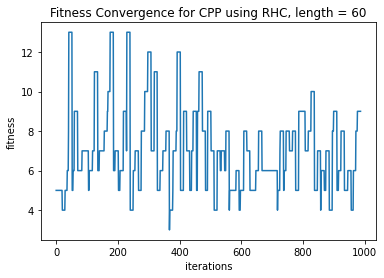

In [406]:
plt.plot(fitness_curve)
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.title('Fitness Convergence for CPP using RHC, length = 60')

   wall clock time  score  iterations  num of attempts
0         0.043729   92.0         531               10
1         0.054794   89.0         616               15
2         0.097293  103.0        1330               20
3         0.070030   50.0         970               25
4         0.053846  110.0         720               30
5         0.056001  107.0         775               35
6         0.058067  110.0         789               40
7         0.118061  108.0        1662               45
8         0.062770   54.0         882               50


,wall clock time,score,iterations,num of attempts
count,9.000000,9.000000,9.000000,9.000000
mean,0.068288,91.444444,919.444444,30.000000
std,0.023983,23.622612,361.339214,13.693064
min,0.043729,50.000000,531.000000,10.000000
25%,0.054794,89.000000,720.000000,20.000000
50%,0.058067,103.000000,789.000000,30.000000
75%,0.070030,108.000000,970.000000,40.000000
max,0.118061,110.000000,1662.000000,50.000000


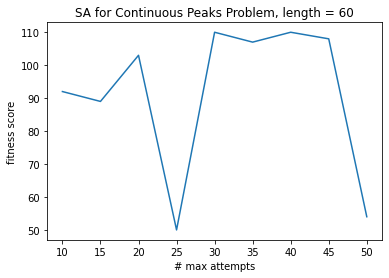

In [407]:
# SA
times = []
scores = []
iterations = []
num_of_attempts =[]
max_attempt = 5

for x in range(0,9):
    max_attempt = max_attempt + 5
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(CPPproblem, max_attempts = max_attempt, curve=True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    num_of_attempts.append(max_attempt)
    
df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['num of attempts'] =num_of_attempts
print(df)

x=num_of_attempts
y=scores
plt.plot(x,y)
plt.title("SA for Continuous Peaks Problem, length = 60")
plt.xlabel("# max attempts")
plt.ylabel("fitness score")

df.describe()

Text(0.5, 1.0, 'Fitness Convergence for CPP using SA, length = 60')

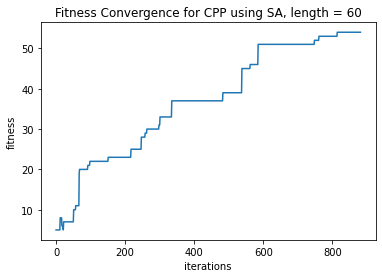

In [408]:
plt.plot(fitness_curve)
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.title('Fitness Convergence for CPP using SA, length = 60')

   wall clock time  score  iterations  pop size
0        20.180521   10.0          11        15
1        28.056045   19.0          15        20
2        32.309697   73.0          17        25
3        25.952975   18.0          14        30
4        24.024808   14.0          13        35
5        29.032761   79.0          15        40
6        22.893610   76.0          12        45
7        26.386850   80.0          14        50
8        31.100470   80.0          17        55


,wall clock time,score,iterations,pop size
count,9.000000,9.000000,9.000000,9.000000
mean,26.659748,49.888889,14.222222,35.000000
std,3.919564,33.028187,2.048034,13.693064
min,20.180521,10.000000,11.000000,15.000000
25%,24.024808,18.000000,13.000000,25.000000
50%,26.386850,73.000000,14.000000,35.000000
75%,29.032761,79.000000,15.000000,45.000000
max,32.309697,80.000000,17.000000,55.000000


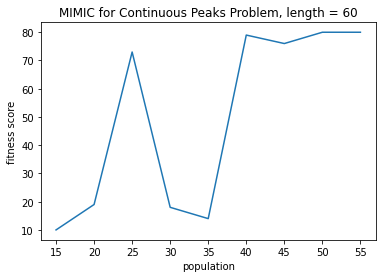

In [409]:
# MIMIC
times = []
scores = []
iterations = []
population_size =[]
population = 10

for x in range(0,9):
    population = population + 5
    
    start = time.time()
    best_state, best_fitness, fitness_curve = mlrose.mimic(CPPproblem, pop_size=population, random_state = 2, curve=True)
    end = time.time()
    
    times.append(end-start)
    scores.append(best_fitness)
    iterations.append(fitness_curve.size)
    population_size.append(population)

df = pd.DataFrame()
df['wall clock time']=times
df['score']=scores
df['iterations']=iterations
df['pop size'] =population_size
print(df)

x=population_size
y=scores
plt.plot(x,y)
plt.title("MIMIC for Continuous Peaks Problem, length = 60")
plt.xlabel("population")
plt.ylabel("fitness score")

df.describe()

Text(0.5, 1.0, 'Fitness Convergence for CPP using MIMIC, length = 60')

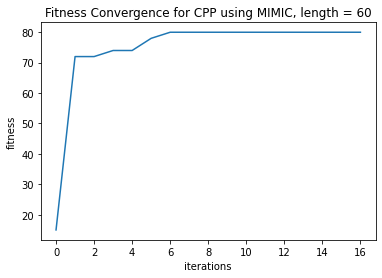

In [410]:
plt.plot(fitness_curve)
plt.xlabel('iterations')
plt.ylabel('fitness')
plt.title('Fitness Convergence for CPP using MIMIC, length = 60')

In [ ]:
############## End Continuous Peaks problem ##############

In [ ]:
############## Begin NN Section ##############

In [411]:
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

In [412]:
redWine = pd.read_csv("winequality-red.csv")

In [413]:
# Adding binary classification column (from A1)
ratingList = []

#1 - good, 0 - not good
for i in range(len(redWine)):
    if redWine.iloc[i,11] > 5.0:
        ratingList.append(1)
    else:
        ratingList.append(0)
        
ratings = pd.Series(ratingList)
redWine['rating'] = ratings.values
redWine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [414]:
# Source: https://towardsdatascience.com/fitting-a-neural-network-using-randomized-optimization-in-python-71595de4ad2d
from sklearn.model_selection import train_test_split

x = redWine.drop(['rating', 'quality'], axis=1)
y = redWine['rating']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2, random_state = 3)

# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training accuracy:  0.5371383893666928
Test accuracy:  0.525
Wall clock time:  6.26873779296875
Loss:  0.7292952227271549


Text(0.5, 1.0, 'Neural Network with RHC')

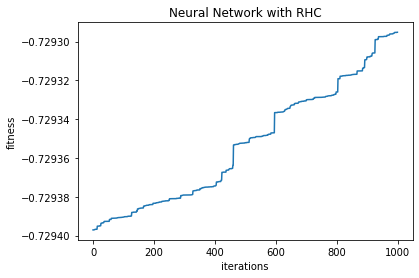

In [415]:
#NN with RHC
# Initialize neural network object and fit object
nn_modelRHC = mlrose.NeuralNetwork(hidden_nodes = [20,10,5], activation = 'sigmoid',
                                 algorithm = 'random_hill_climb', max_iters = 1000,
                                 bias = True, is_classifier = True, learning_rate =0.0001,
                                 early_stopping = False, clip_max = 5, max_attempts = 100, random_state = 3, curve=True)

start = time.time()
nn_modelRHC.fit(X_train_scaled, y_train)
# Predict labels for train set and assess accuracy
y_train_pred = nn_modelRHC.predict(X_train_scaled)
end = time.time()

y_train_accuracy = accuracy_score(y_train, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_modelRHC.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Test accuracy: ', y_test_accuracy)
print('Wall clock time: ', end-start)
print('Loss: ', nn_modelRHC.loss)

plt.plot(nn_modelRHC.fitness_curve)
plt.xlabel("iterations")
plt.ylabel("fitness")
plt.title("Neural Network with RHC")

In [416]:
# Source: https://chrisalbon.com/code/deep_learning/keras/k-fold_cross-validating_neural_networks/
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#cross-validation
# cross_val_scores = cross_val_score(nn_modelRHC, redWine.drop(['rating', 'quality'], axis=1), redWine['rating'], cv=5)
cross_val_scores = cross_val_score(nn_modelRHC, redWine.iloc[:, 2:-2].values, redWine.iloc[:, -1].values, cv=StratifiedKFold(shuffle=True))#,scoring='roc_auc')
print(cross_val_scores)
print(cross_val_scores.max())

[0.471875   0.465625   0.534375   0.534375   0.53605016]
0.5360501567398119


Training accuracy:  0.7357310398749023
Test accuracy:  0.76875
Wall clock time:  9.13326907157898
Loss:  0.5050568232074941


Text(0.5, 1.0, 'Neural Network with GD')

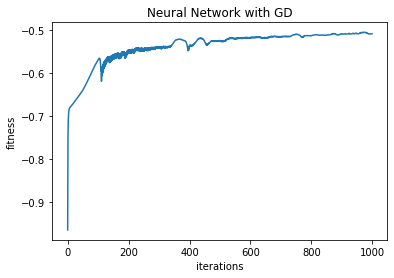

In [417]:
#NN with GD
# Initialize neural network object and fit object
nn_modelGD = mlrose.NeuralNetwork(hidden_nodes = [20,10,5], activation = 'relu',
                                 algorithm = 'gradient_descent', max_iters = 1000,
                                 bias = True, is_classifier = True, learning_rate = 0.0001,
                                 early_stopping = False, clip_max = 5, max_attempts = 100,
                                 random_state = 3, curve = True)
start = time.time()
nn_modelGD.fit(X_train_scaled, y_train)
# Predict labels for train set and assess accuracy
y_train_pred = nn_modelGD.predict(X_train_scaled)
end = time.time()

y_train_accuracy = accuracy_score(y_train, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_modelGD.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Test accuracy: ', y_test_accuracy)
print('Wall clock time: ', end-start)
print('Loss: ', nn_modelGD.loss)

plt.plot(nn_modelGD.fitness_curve)
plt.xlabel("iterations")
plt.ylabel("fitness")
plt.title("Neural Network with GD")

In [418]:
# Source: https://chrisalbon.com/code/deep_learning/keras/k-fold_cross-validating_neural_networks/
#cross-validation
cross_val_scores = cross_val_score(nn_modelGD, redWine.iloc[:, 2:-2].values, redWine.iloc[:, -1].values, cv=StratifiedKFold(shuffle=True))#,scoring='roc_auc')
print(cross_val_scores)
print(cross_val_scores.max())

[0.534375   0.5375     0.465625   0.60625    0.46394984]
0.60625


Training accuracy:  0.5371383893666928
Test accuracy:  0.525
Wall clock time:  7.654667854309082
Loss:  0.7293780405873663


Text(0.5, 1.0, 'Neural Network with SA')

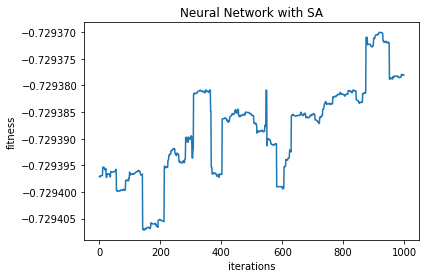

In [419]:
#NN with SA
# Initialize neural network object and fit object
nn_modelSA = mlrose.NeuralNetwork(hidden_nodes = [20,10,5], activation = 'sigmoid',
                                 algorithm = 'simulated_annealing', max_iters = 1000,
                                 bias = True, is_classifier = True, learning_rate = 0.0001,
                                 early_stopping = False, clip_max = 5, max_attempts = 100,
                                 random_state = 3, curve = True, schedule = mlrose.ExpDecay())
start = time.time()
nn_modelSA.fit(X_train_scaled, y_train)
# Predict labels for train set and assess accuracy
y_train_pred = nn_modelSA.predict(X_train_scaled)
end = time.time()

y_train_accuracy = accuracy_score(y_train, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_modelSA.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Test accuracy: ', y_test_accuracy)
print('Wall clock time: ', end-start)
print('Loss: ', nn_modelSA.loss)

plt.plot(nn_modelSA.fitness_curve)
plt.xlabel("iterations")
plt.ylabel("fitness")
plt.title("Neural Network with SA")

In [420]:
# Source: https://chrisalbon.com/code/deep_learning/keras/k-fold_cross-validating_neural_networks/
#cross-validation
cross_val_scores = cross_val_score(nn_modelSA, redWine.iloc[:, 2:-2].values, redWine.iloc[:, -1].values, cv=StratifiedKFold(shuffle=True))#,scoring='roc_auc')
print(cross_val_scores)
print(cross_val_scores.max())

[0.465625   0.6125     0.434375   0.465625   0.53605016]
0.6125


Training accuracy:  0.7036747458952306
Test accuracy:  0.728125
Wall clock time:  1001.7396628856659
Loss:  0.5916807928118397


Text(0.5, 1.0, 'Neural Network with GA')

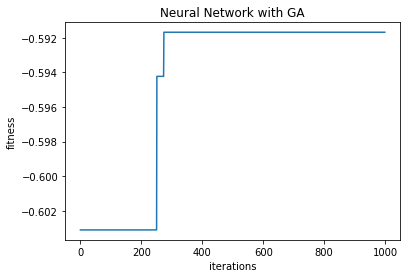

In [421]:
#NN with GA
# Initialize neural network object and fit object
nn_modelGA = mlrose.NeuralNetwork(hidden_nodes = [20,10,5], activation = 'sigmoid',
                                 algorithm = 'genetic_alg', max_iters = 1000,
                                 bias = True, is_classifier = True, learning_rate = 0.0001,
                                 early_stopping = False, clip_max = 5, max_attempts = 100,
                                 random_state = 3, curve = True)
start = time.time()
nn_modelGA.fit(X_train_scaled, y_train)
# Predict labels for train set and assess accuracy
y_train_pred = nn_modelGA.predict(X_train_scaled)
end = time.time()

y_train_accuracy = accuracy_score(y_train, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_modelGA.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Test accuracy: ', y_test_accuracy)
print('Wall clock time: ', end-start)
print('Loss: ', nn_modelGA.loss)

plt.plot(nn_modelGA.fitness_curve)
plt.xlabel("iterations")
plt.ylabel("fitness")
plt.title("Neural Network with GA")

In [422]:
# Source: https://chrisalbon.com/code/deep_learning/keras/k-fold_cross-validating_neural_networks/
#cross-validation
#cross-validation
cross_val_scores = cross_val_score(nn_modelGA, redWine.iloc[:, 2:-2].values, redWine.iloc[:, -1].values, cv=StratifiedKFold(shuffle=True))#,scoring='roc_auc')
print(cross_val_scores)
print(cross_val_scores.max())

[0.628125   0.534375   0.534375   0.534375   0.46394984]
0.628125


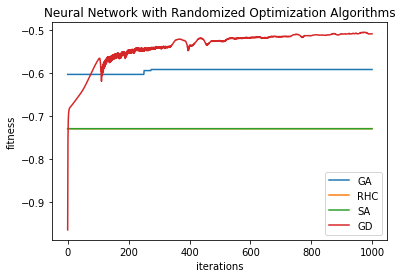

In [423]:
plt.plot(nn_modelGA.fitness_curve, label = 'GA')
plt.plot(nn_modelRHC.fitness_curve, label = 'RHC')
plt.plot(nn_modelSA.fitness_curve, label = 'SA')
plt.plot(nn_modelGD.fitness_curve, label = 'GD')
plt.xlabel("iterations")
plt.ylabel("fitness")
plt.title("Neural Network with Randomized Optimization Algorithms")
plt.legend()

In [424]:
#NN with RHC hyperparameter tuning
# Initialize neural network object and fit object
RHClosses = []
RHCtraining_acc = []
RHCtesting_acc = []
RHCvalidation_acc = []
RHCfitness_curves = []
RHCtimes = []
RHCrates = []

rate = 0.0001

for x in range (0,20):
    nn_modelRHC = mlrose.NeuralNetwork(hidden_nodes = [20,10,5], activation = 'sigmoid',
                                     algorithm = 'random_hill_climb', max_iters = 1000,
                                     bias = True, is_classifier = True, learning_rate =rate,
                                     early_stopping = False, clip_max = 5, max_attempts = 100, random_state = 3, curve=True)

    start = time.time()
    nn_modelRHC.fit(X_train_scaled, y_train)
    # Predict labels for train set and assess accuracy
    y_train_pred = nn_modelRHC.predict(X_train_scaled)
    end = time.time()

    RHCtraining_acc.append(accuracy_score(y_train, y_train_pred))
    y_test_pred = nn_modelRHC.predict(X_test_scaled)
    RHCtesting_acc.append(accuracy_score(y_test, y_test_pred))
    RHCvalidation_acc.append(cross_val_score(nn_modelRHC, redWine.drop(['rating', 'quality'], axis=1), redWine['rating'], cv=5).max())
    
    RHClosses.append(nn_modelRHC.loss)
    RHCfitness_curves.append(nn_modelRHC.fitness_curve)
    RHCtimes.append(end-start)
    RHCrates.append(rate)
    
    rate = rate + 0.001

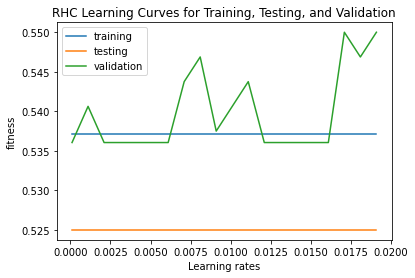

In [425]:
plt.plot(RHCrates, RHCtraining_acc, label = 'training')
plt.plot(RHCrates,RHCtesting_acc, label = 'testing')
plt.plot(RHCrates,RHCvalidation_acc, label = 'validation')
plt.xlabel("Learning rates")
plt.ylabel("fitness")
plt.title("RHC Learning Curves for Training, Testing, and Validation")
plt.legend()

Text(0.5, 1.0, 'Loss as Learning Rate Increases using RHC')

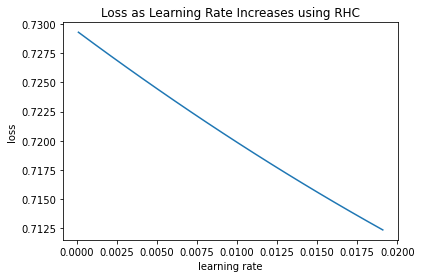

In [426]:
plt.plot(RHCrates, RHClosses)
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Loss as Learning Rate Increases using RHC")

In [362]:
#NN with GD hyperparameter tuning
# Initialize neural network object and fit object
from sklearn.model_selection import StratifiedKFold

GDlosses = []
GDtraining_acc = []
GDtesting_acc = []
GDvalidation_acc = []
GDfitness_curves = []
GDtimes = []
GDrates = []

rate = 0.0001

for x in range (0,20):
    nn_modelGD = mlrose.NeuralNetwork(hidden_nodes = [20,10,5], activation = 'relu',
                                     algorithm = 'gradient_descent', max_iters = 1000,
                                     bias = True, is_classifier = True, learning_rate =rate,
                                     early_stopping = False, clip_max = 5, max_attempts = 100, random_state = 3, curve=True)

    start = time.time()
    nn_modelGD.fit(X_train_scaled, y_train)
    # Predict labels for train set and assess accuracy
    y_train_pred = nn_modelGD.predict(X_train_scaled)
    end = time.time()

    GDtraining_acc.append(accuracy_score(y_train, y_train_pred))
    y_test_pred = nn_modelGD.predict(X_test_scaled)
    GDtesting_acc.append(accuracy_score(y_test, y_test_pred))
    GDvalidation_acc.append(cross_val_score(nn_modelGD, redWine.drop(['rating', 'quality'], axis=1), redWine['rating'], cv=5).max())
    
    GDlosses.append(nn_modelGD.loss)
    GDfitness_curves.append(nn_modelGD.fitness_curve)
    GDtimes.append(end-start)
    GDrates.append(rate)
    
    rate = rate + 0.0001

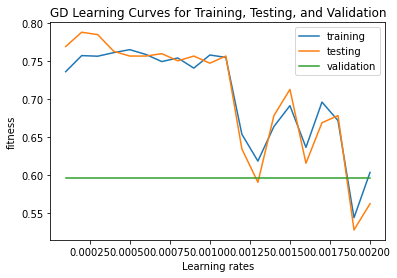

In [363]:
plt.plot(GDrates, GDtraining_acc, label = 'training')
plt.plot(GDrates,GDtesting_acc, label = 'testing')
plt.plot(GDrates,GDvalidation_acc, label = 'validation')
plt.xlabel("Learning rates")
plt.ylabel("fitness")
plt.title("GD Learning Curves for Training, Testing, and Validation")
plt.legend()

Text(0.5, 1.0, 'Loss as Learning Rate Increases using GD')

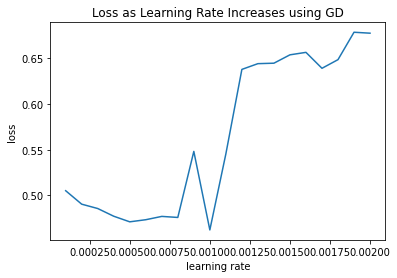

In [375]:
plt.plot(GDrates, GDlosses)
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Loss as Learning Rate Increases using GD")

In [366]:
#NN with SA hyperparameter tuning
# Initialize neural network object and fit object
SAlosses = []
SAtraining_acc = []
SAtesting_acc = []
SAvalidation_acc = []
SAfitness_curves = []
SAtimes = []
SArates = []

rate = 0.0001

for x in range (0,20):
    nn_modelSA = mlrose.NeuralNetwork(hidden_nodes = [20,10,5], activation = 'sigmoid',
                                     algorithm = 'simulated_annealing', max_iters = 1000,
                                     bias = True, is_classifier = True, learning_rate =rate,
                                     early_stopping = False, clip_max = 5, max_attempts = 100, random_state = 3, curve=True)

    start = time.time()
    nn_modelSA.fit(X_train_scaled, y_train)
    # Predict labels for train set and assess accuracy
    y_train_pred = nn_modelSA.predict(X_train_scaled)
    end = time.time()

    SAtraining_acc.append(accuracy_score(y_train, y_train_pred))
    y_test_pred = nn_modelSA.predict(X_test_scaled)
    SAtesting_acc.append(accuracy_score(y_test, y_test_pred))
    SAvalidation_acc.append(cross_val_score(nn_modelSA, redWine.drop(['rating', 'quality'], axis=1), redWine['rating'], cv=5).max())
    
    SAlosses.append(nn_modelSA.loss)
    SAfitness_curves.append(nn_modelSA.fitness_curve)
    SAtimes.append(end-start)
    SArates.append(rate)
    
    rate = rate + 0.001

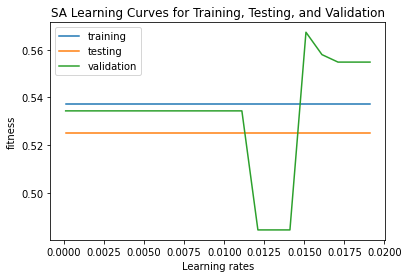

In [367]:
plt.plot(SArates, SAtraining_acc, label = 'training')
plt.plot(SArates,SAtesting_acc, label = 'testing')
plt.plot(SArates,SAvalidation_acc, label = 'validation')
plt.xlabel("Learning rates")
plt.ylabel("fitness")
plt.title("SA Learning Curves for Training, Testing, and Validation")
plt.legend()

Text(0.5, 1.0, 'Loss as Learning Rate Increases using SA')

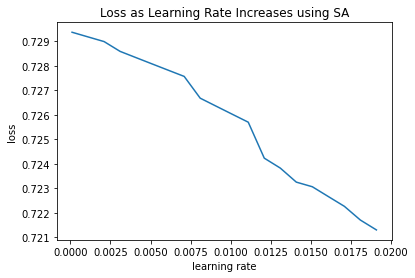

In [376]:
plt.plot(SArates, SAlosses)
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Loss as Learning Rate Increases using SA")

In [427]:
#NN with GA hyperparameter tuning
# Initialize neural network object and fit object
GAlosses = []
GAtraining_acc = []
GAtesting_acc = []
GAvalidation_acc = []
GAfitness_curves = []
GAtimes = []
GArates = []

rate = 0.0001

for x in range (0,10):
    nn_modelGA = mlrose.NeuralNetwork(hidden_nodes = [5], activation = 'sigmoid',
                                     algorithm = 'genetic_alg', max_iters = 1000,
                                     bias = True, is_classifier = True, learning_rate =rate,
                                     early_stopping = False, clip_max = 5, max_attempts = 100, random_state = 3, curve=True)

    start = time.time()
    nn_modelGA.fit(X_train_scaled, y_train)
    # Predict labels for train set and assess accuracy
    y_train_pred = nn_modelGA.predict(X_train_scaled)
    end = time.time()

    GAtraining_acc.append(accuracy_score(y_train, y_train_pred))
    y_test_pred = nn_modelGA.predict(X_test_scaled)
    GAtesting_acc.append(accuracy_score(y_test, y_test_pred))
    GAvalidation_acc.append(cross_val_score(nn_modelGA, redWine.drop(['rating', 'quality'], axis=1), redWine['rating'], cv=5).max())

    
    GAlosses.append(nn_modelGA.loss)
    GAfitness_curves.append(nn_modelGA.fitness_curve)
    GAtimes.append(end-start)
    GArates.append(rate)
    
    rate = rate + 0.001

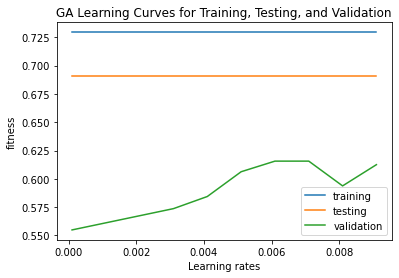

In [428]:
plt.plot(GArates, GAtraining_acc, label = 'training')
plt.plot(GArates,GAtesting_acc, label = 'testing')
plt.plot(GArates,GAvalidation_acc, label = 'validation')
plt.xlabel("Learning rates")
plt.ylabel("fitness")
plt.title("GA Learning Curves for Training, Testing, and Validation")
plt.legend()

Text(0.5, 1.0, 'Loss as Learning Rate Increases using GA')

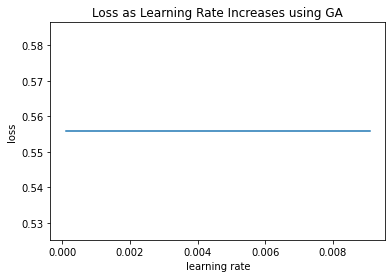

In [429]:
plt.plot(GArates, GAlosses)
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Loss as Learning Rate Increases using GA")

In [431]:
GAtimes

[268.3462886810303,
 261.49441266059875,
 275.61134672164917,
 269.9351370334625,
 271.2534966468811,
 271.69520568847656,
 272.88667392730713,
 272.0262804031372,
 276.2813196182251,
 276.67995047569275]

In [ ]:
############## End of Notebook ##############